In [21]:
import pandas as pd
import numpy as np
import popsims

import matplotlib.pyplot as plt
import glob
from popsims.plot_style import  plot_style

plot_style()
#plt.style.use('dark_background')
%matplotlib inline

In [2]:
#get a model of 1000 K object
def get_lowz_model(teff,  z):
    model='line2021'
    sdmodels=np.load('/Volumes/LaCie/popsimsdata/subdwarfs_models_{}.npy'.format(model), allow_pickle=True)[0]
    spectra= np.array(sdmodels['spectra'])
    teffs= sdmodels['teff']
    loggs=sdmodels['logg']
    zs=sdmodels['z']
    return spectra[np.logical_and.reduce([teffs==teff, zs==z])]

s0=get_lowz_model( 1000,.0)[6]
s1=get_lowz_model( 1000,-2.5)[0]


s3=get_lowz_model( 1600,.0)[6]
s4=get_lowz_model( 1600,-2.5)[0]



s0.trim([0.1, 1.15])
s0.normalize([0.78, 0.79])

s1.trim([0.1, 1.15])
s1.normalize([0.78, 0.79])


s3.trim([0.1, 1.15])
s3.normalize([0.78, 0.79])


s4.trim([0.1, 1.15])
s4.normalize([0.78, 0.79])



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [3]:
s0.wave.min()

<Quantity 0.10005531 micron>

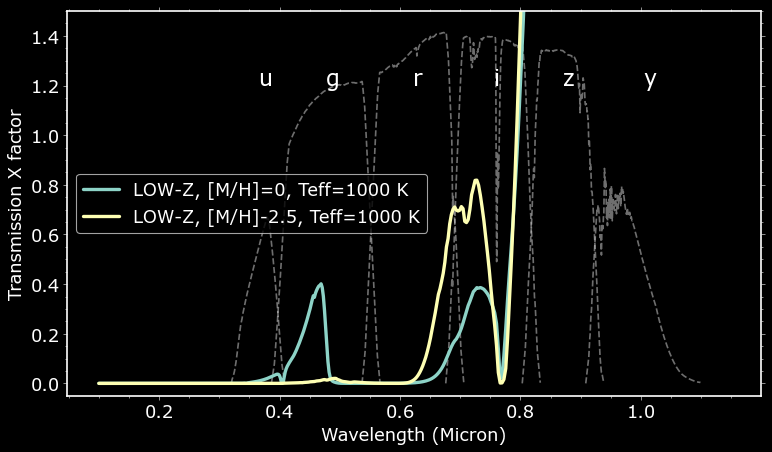

In [20]:
#visualizing filter profiles

fig, ax=plt.subplots(figsize=(10, 6))
for f in glob.glob('/users/caganze/research/splat/resources/filters/LSST*.dat'):
    #transform to .txt
    try:
        d=pd.read_csv(f, names=['LAM', 'TRANSMISSION'], sep=' ').astype(float)
        d['LAM']= d['LAM']/10_000
        #d.to_csv(f.replace('.dat', '.txt'), sep=' ', index=False)
        plt.plot(d.LAM, d.TRANSMISSION*3, alpha=0.5, linestyle='--', color='#DDDDDD')
        fname=(((f.split('/')[-1]).split('.dat')[0]).split('LSST.')[-1])
        ax.text(d.LAM.median(), 1.2, fname, fontsize=20,)
    except ValueError:
        pass
    
from astropy.io import ascii
#for f in glob.glob('/users/caganze/research/splat/resources/filters/*starrs*.txt'):
#    d=(ascii.read(f).to_pandas())
#    try:
#        plt.plot(d.lam, d.trans, alpha=0.5, linestyle=':', color='#FF851B')
#    except:
#        plt.plot(d.LAM, d.trans, alpha=0.5, linestyle=':', color='#FF851B')
#    
#    fname=(((f.split('/')[-1]).split('.dat')[0]).split('LSST.')[-1])
#    ax.text(d.lam.median(), 0.0, fname, fontsize=20,)

ax.plot(s0.wave, s0.flux.value/1.5, linewidth=3, label='LOW-Z, [M/H]=0, Teff=1000 K')
ax.plot(s1.wave, s1.flux.value/1.5, linewidth=3,  label='LOW-Z, [M/H]-2.5, Teff=1000 K')
#ax.plot(s3.wave, s3.flux.value, linewidth=3)
#ax.plot(s4.wave, s4.flux.value, linewidth=3)
ax.minorticks_on()
plt.legend()
ax.set(xlabel='Wavelength (Micron)', ylabel='Transmission X factor', ylim=[-0.05, 1.5])
plt.tight_layout()

plt.savefig('../figures/lsst_filters.pdf')